# 🔍 Extended Control Scan — Polygon‑to‑Circle & Harmonic Ratios

This notebook widens the control experiment in one click:

* **Polygon‑to‑circle ratios:** √k / π for k = 2 … 12.  
* **Harmonic ratios:** 1 / Hₙ where Hₙ is the n‑th harmonic number (n = 2 … 12).  
* Adds their **inverses** (π / √k and Hₙ).

Everything runs at **128‑bit precision** and reports the best Δ under a 10⁻⁵ threshold, plus hit counts.

Just open in **Colab** and hit **Runtime ▸ Run all**.


In [5]:
# ⬇️ Imports & precision
import mpmath as mp, pandas as pd, numpy as np, matplotlib.pyplot as plt, itertools, time
mp.mp.dps = 40  # 128‑bit
MAX_BITS = 45
THRESH = mp.mpf('1e-10')

def harmonic(n):
    return mp.nsum(lambda k: 1/mp.mpf(k), [1, n])

# --- Build constant list ---
polygon_consts  = [('poly_'+str(k), mp.sqrt(k)/mp.pi)      for k in range(2, 13)]
harmonic_consts = [('harm_'+str(n), 1/harmonic(n))        for n in range(2, 13)]
inv_polygon     = [('polyInv_'+str(k), mp.pi/mp.sqrt(k))  for k in range(2, 13)]
inv_harmonic    = [('harmInv_'+str(n), harmonic(n))       for n in range(2, 13)]

CONSTANTS = polygon_consts + harmonic_consts + inv_polygon + inv_harmonic
print('Total test constants:', len(CONSTANTS))


Total test constants: 44


In [6]:
# ⚡ Nearest‑numerator scan
def nearest_hits(C, max_bits, thresh):
    hits = []
    sqrtC = mp.sqrt(C)
    for n in range(1, max_bits + 1):
        denom_int = 1 << n
        denom     = mp.mpf(denom_int)
        i         = int(mp.nint(sqrtC * denom))
        val       = (mp.mpf(i)/denom)**2
        delta     = abs(val - C)
        if delta < thresh:
            hits.append((n, i, delta))
    return hits


,constant,n,i,best Δ,hit_count
31,polyInv_11,45,34243375638739,2.394845824295674185391596279104039419664e-15,12
21,harm_12,45,19973040119827,2.633460752363938651528679108145150339976e-15,14
24,polyInv_4,44,22048535475751,3.109785025541845467760606782785467094539e-15,13
18,harm_9,45,20918751840545,3.263970317985488227716467776462321589983e-15,15
22,polyInv_2,44,26220275263153,3.500592557118800479353870378656910974115e-15,13
19,harm_10,44,10279274813211,4.5754624251485248725153626709609662835e-15,13
9,poly_11,45,36151226805015,4.871174637493820507096678678256043518626e-15,13
13,harm_4,44,12188224018053,5.224543783336293123070218547445471182886e-15,13
0,poly_2,45,23606541633547,8.48554902201698924538940817015743196029e-15,15
15,harm_6,45,22478470781793,9.118644344470222213475197045969292287617e-15,14


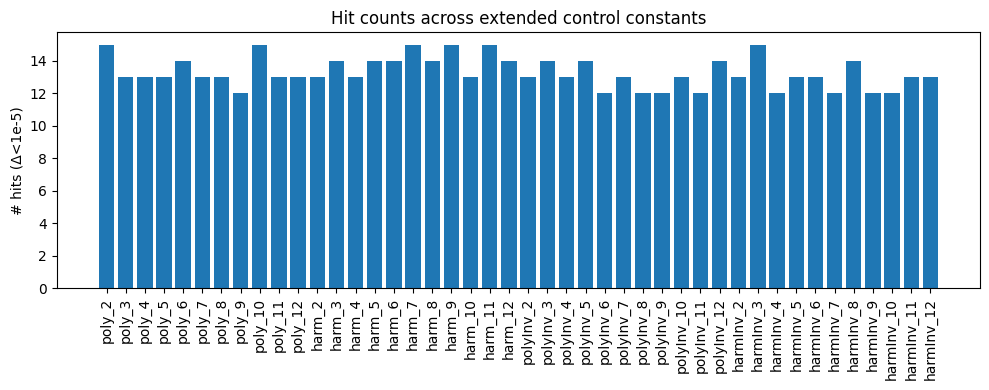

Elapsed 0.41 s


In [7]:
# ▶️ Run extended scans
start = time.time()
rows, delta_lists = [], {}

for name,const in CONSTANTS:
    hits = nearest_hits(const, MAX_BITS, THRESH)
    delta_lists[name] = [h[2] for h in hits]
    best = min(hits, key=lambda t: t[2]) if hits else (None,None,None)
    rows.append((name, *best, len(hits)))

df = pd.DataFrame(rows, columns=['constant','n','i','best Δ','hit_count'])
display(df.sort_values('best Δ').head(20))

# Bar chart of hit counts
plt.figure(figsize=(10,4))
labels = [r[0] for r in rows]
counts = [r[4] for r in rows]
plt.bar(range(len(labels)), counts)
plt.xticks(range(len(labels)), labels, rotation=90)
plt.ylabel('# hits (Δ<1e-5)')
plt.title('Hit counts across extended control constants')
plt.tight_layout()
plt.show()

print('Elapsed %.2f s' % (time.time()-start))


In [8]:
# 💾 Save CSV
import datetime, os
ts = datetime.datetime.utcnow().strftime('%Y%m%d_%H%M%S')
csv_name = f'extended_control_results_{ts}.csv'
df.to_csv(csv_name, index=False)
print('Saved results to', csv_name)


Saved results to extended_control_results_20250716_103023.csv
